In [16]:
# Assignment 5

# EDA 1

In [17]:
import pandas as pd

df = pd.read_csv('Cardiotocographic.csv')

df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [18]:
print(df.isnull().sum())      # null value count for every column

print(df.isnull().mean())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
LB          0.009878
AC          0.009407
FM          0.000000
UC          0.000000
DL          0.000000
DS          0.009878
DP          0.009878
ASTV        0.000000
MSTV        0.000000
ALTV        0.000000
MLTV        0.009878
Width       0.009878
Tendency    0.009878
NSP         0.009878
dtype: float64


In [21]:
# since percenage of missing values is less , we impute with 'median'

In [22]:
# filling missing values by 'median'

from sklearn.impute import SimpleImputer

for i in df.columns:
    if df[i].isnull().sum()>0:
        si = SimpleImputer(strategy='median')
        df[[i]] = si.fit_transform(df[[i]])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [28]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,70.395387,0.313246,1.301499
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,42.720508,0.643186,0.642133
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [43]:
# detecting outliers using IQR

for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = (df[i] < lower) | (df[i] > upper)
    
    print(f"Outliers in {i}: {outliers.sum()} thats {outliers.mean()*100 :.2f}%")

Outliers in LB: 10 thats 0.47%
Outliers in AC: 43 thats 2.02%
Outliers in FM: 347 thats 16.32%
Outliers in UC: 13 thats 0.61%
Outliers in DL: 125 thats 5.88%
Outliers in DS: 120 thats 5.64%
Outliers in DP: 284 thats 13.36%
Outliers in ASTV: 10 thats 0.47%
Outliers in MSTV: 80 thats 3.76%
Outliers in ALTV: 318 thats 14.96%
Outliers in MLTV: 81 thats 3.81%
Outliers in Width: 10 thats 0.47%
Outliers in Tendency: 10 thats 0.47%
Outliers in NSP: 559 thats 26.29%


observation :

- FM , DP , ALTV have moderate percentage of outliers 
- but  NSP has high percenatge of outiers

In [47]:
# statistics 

for i in df.columns:
    
    print(f'mean of {i} : {df[i].mean():.2f}')
    print(f'meadian of {i} : {df[i].median()}')
    print(f'std deviation of {i} : {df[i].std():.2f}')
        
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    print(f'IQR for {i} : {Q3 - Q1:.2f}')
    print('-'*20)

mean of LB : 133.34
meadian of LB : 133.0
std deviation of LB : 11.21
IQR for LB : 14.00
--------------------
mean of AC : 0.00
meadian of AC : 0.001633991
std deviation of AC : 0.00
IQR for AC : 0.01
--------------------
mean of FM : 0.01
meadian of FM : 0.0
std deviation of FM : 0.07
IQR for FM : 0.00
--------------------
mean of UC : 0.00
meadian of UC : 0.004484305
std deviation of UC : 0.00
IQR for UC : 0.00
--------------------
mean of DL : 0.00
meadian of DL : 0.0
std deviation of DL : 0.00
IQR for DL : 0.00
--------------------
mean of DS : 0.00
meadian of DS : 0.0
std deviation of DS : 0.00
IQR for DS : 0.00
--------------------
mean of DP : 0.00
meadian of DP : 0.0
std deviation of DP : 0.00
IQR for DP : 0.00
--------------------
mean of ASTV : 47.00
meadian of ASTV : 49.0
std deviation of ASTV : 18.81
IQR for ASTV : 29.00
--------------------
mean of MSTV : 1.36
meadian of MSTV : 1.2
std deviation of MSTV : 1.17
IQR for MSTV : 1.00
--------------------
mean of ALTV : 10.29
m

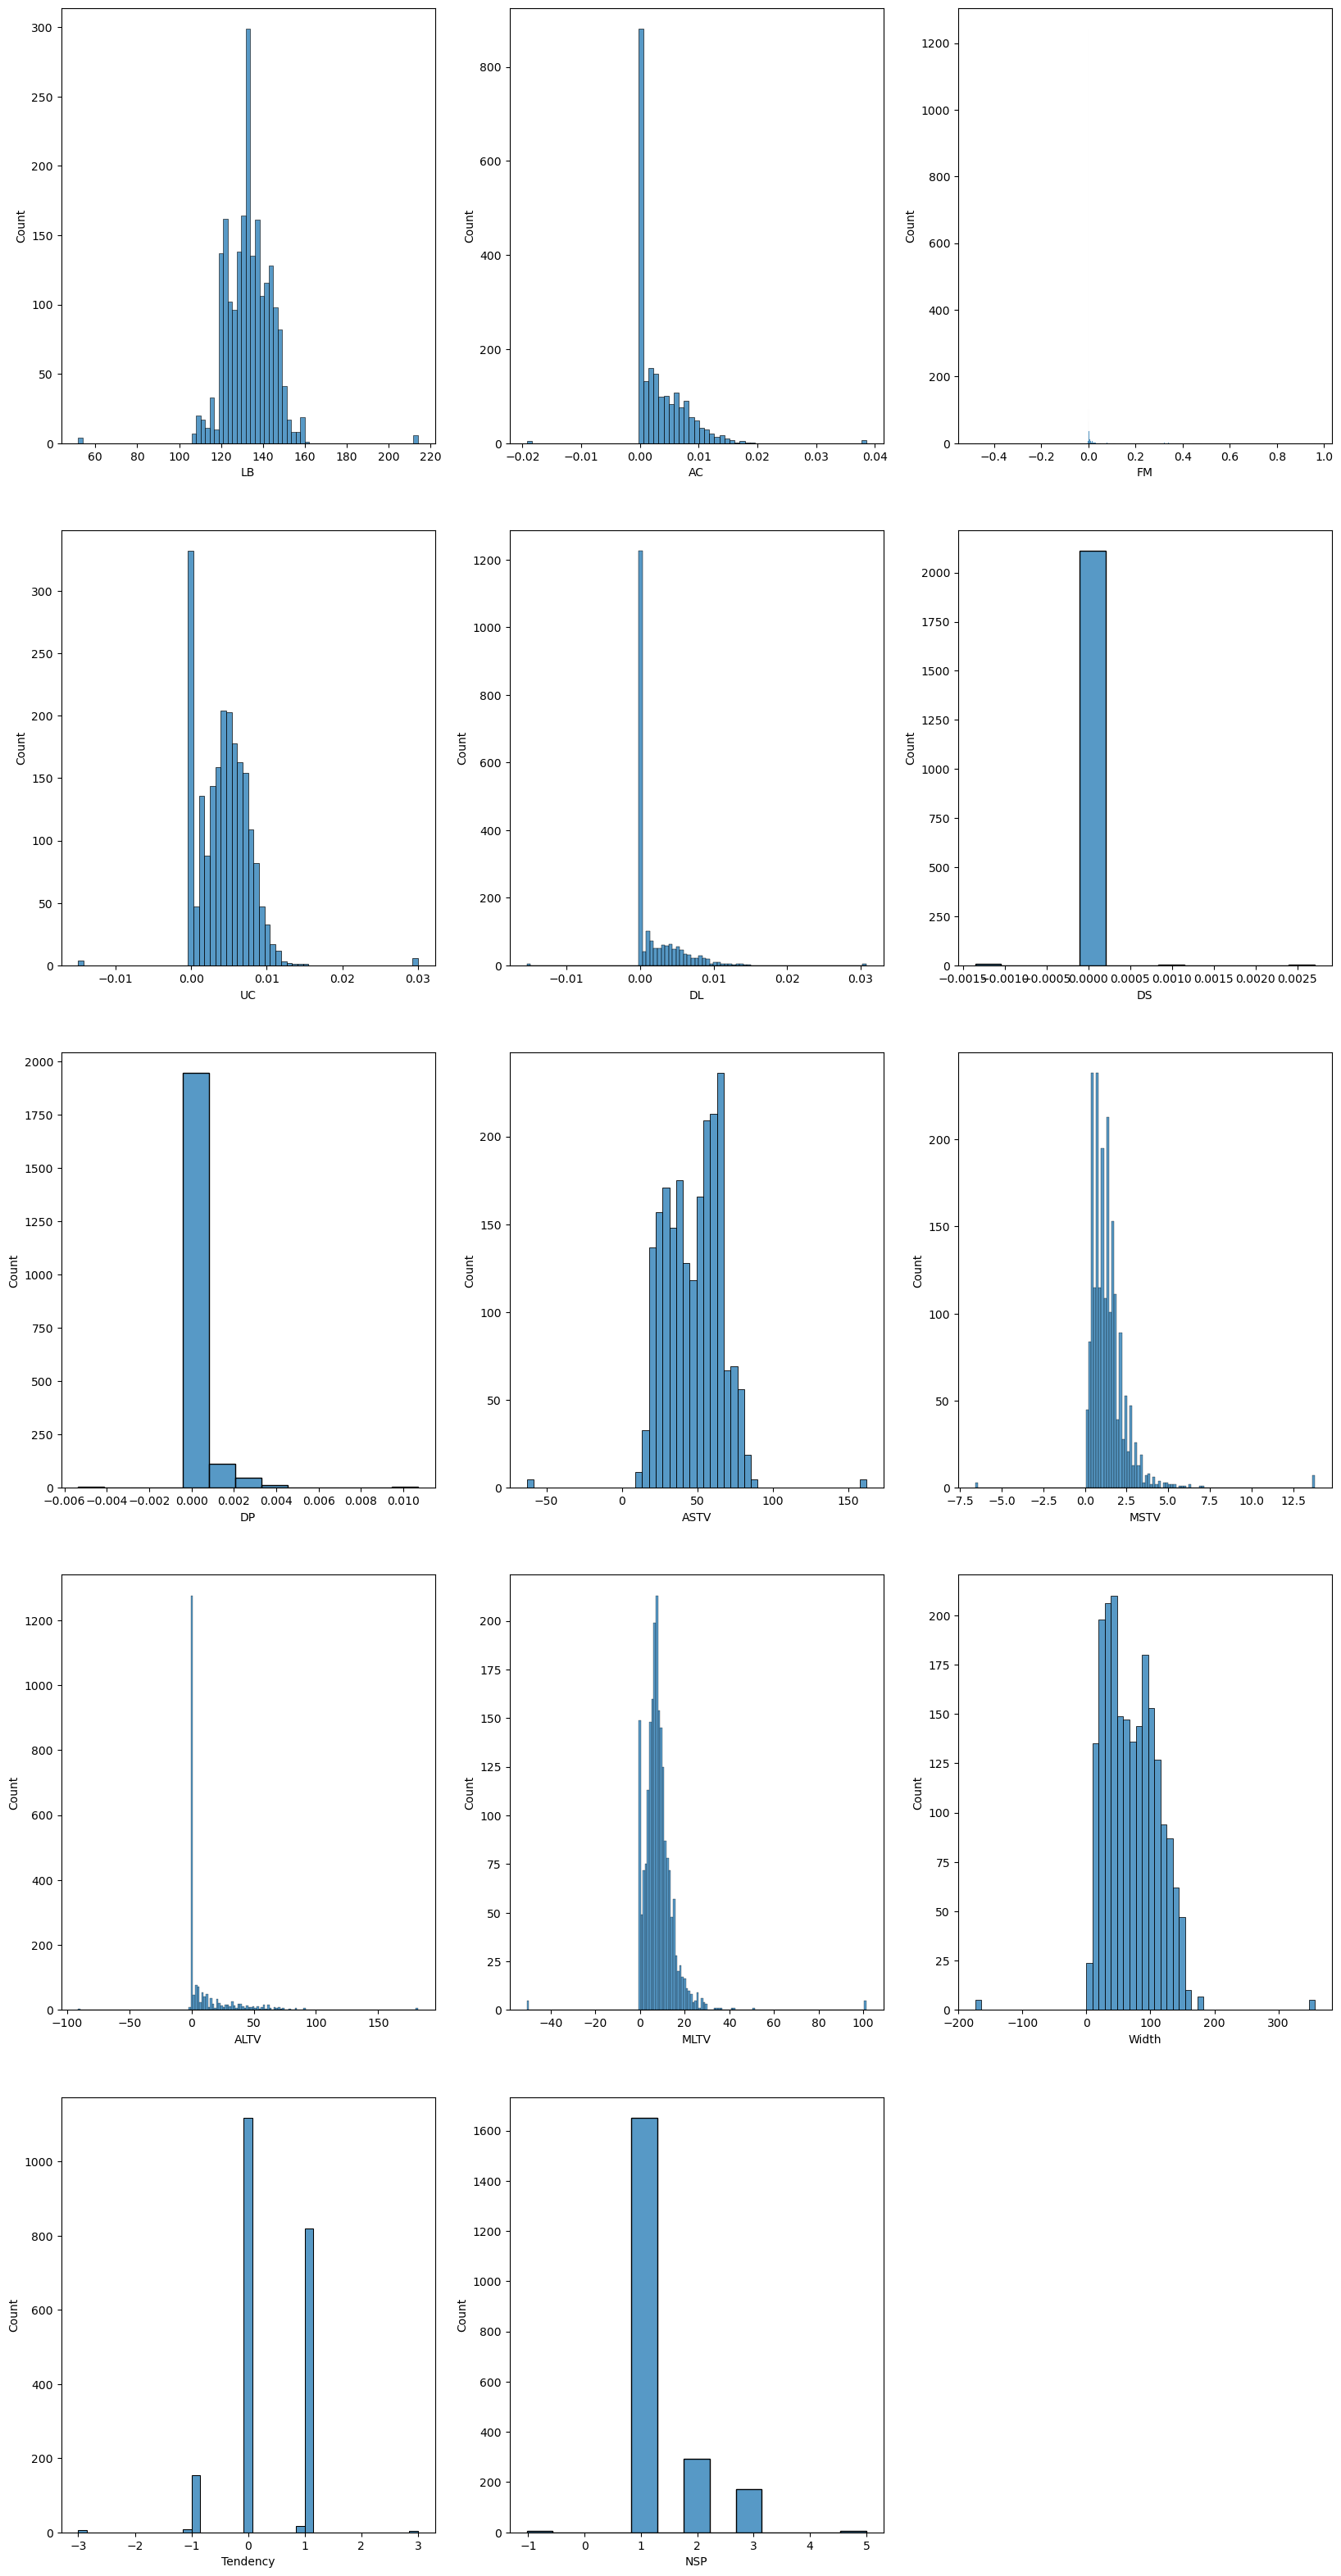

In [55]:
# Data Visualization

# histograms
from matplotlib import pyplot as plt
import seaborn  as sns

plt.figure(figsize=(20,40))
for i,col in enumerate(df.columns,1):
    plt.subplot(5,3,i)
    sns.histplot(df[col])
    

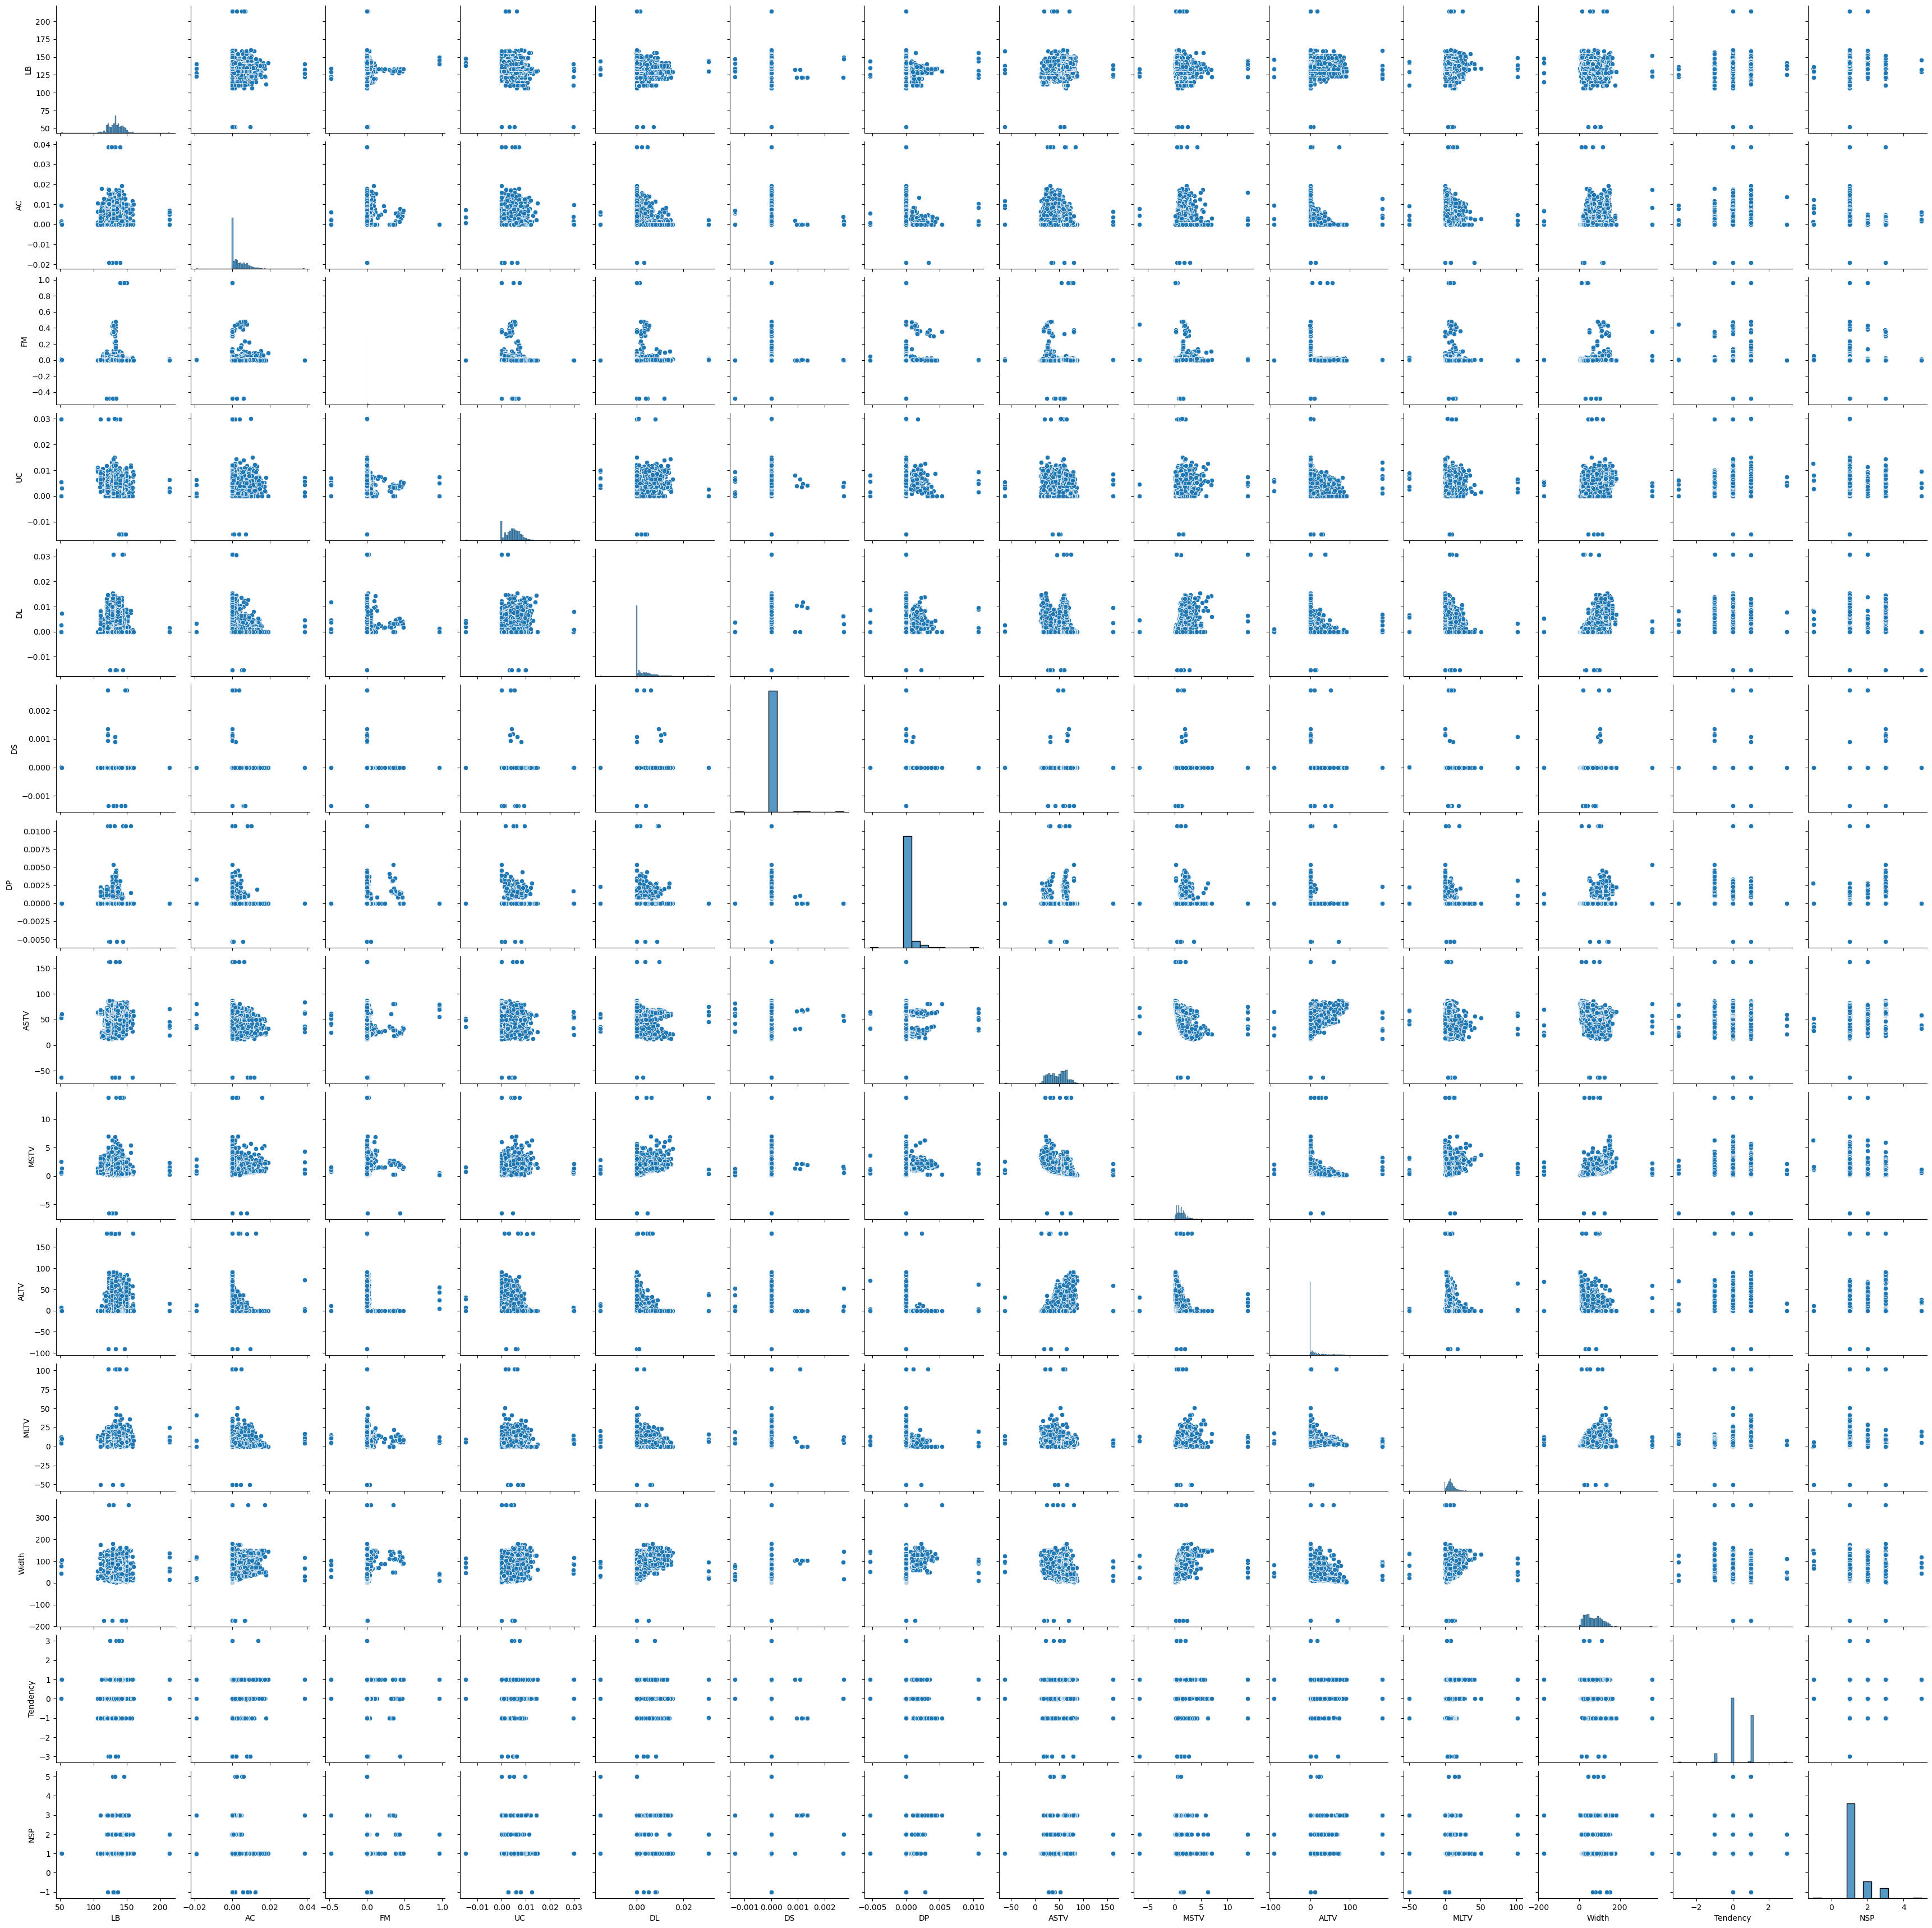

In [57]:
# pair plot
sns.pairplot(df)

<Axes: >

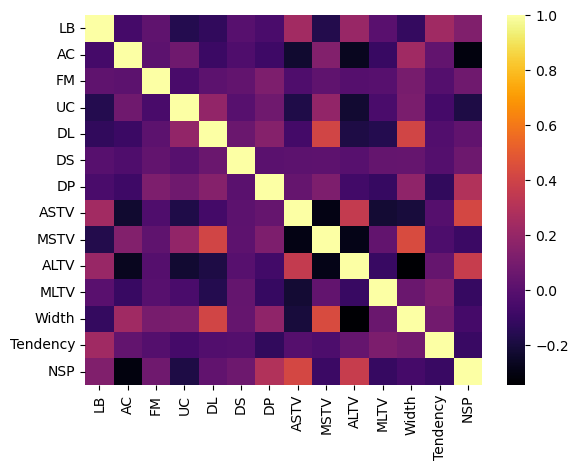

In [60]:
# heatmap

# correlation between features

sns.heatmap(df.corr(),cmap='inferno')

In [61]:
# correlation between features

df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062813,0.018807,-0.166229,-0.126563,-0.005432,-0.047650,0.241857,-0.169647,0.210542,-0.003423,-0.118397,0.236730,0.131839
AC,-0.062813,1.000000,0.009768,0.071621,-0.093449,-0.033088,-0.083298,-0.230470,0.132962,-0.269807,-0.104853,0.234549,0.031710,-0.311689
FM,0.018807,0.009768,1.000000,-0.053226,0.009718,0.029916,0.121459,-0.032691,0.017055,-0.011936,-0.006121,0.097282,-0.017819,0.074446
UC,-0.166229,0.071621,-0.053226,1.000000,0.190128,-0.006938,0.070295,-0.181161,0.189406,-0.227304,-0.049452,0.107083,-0.066832,-0.185229
DL,-0.126563,-0.093449,0.009718,0.190128,1.000000,0.058413,0.144717,-0.069361,0.410102,-0.186967,-0.165293,0.408578,-0.023914,0.024879
DS,-0.005432,-0.033088,0.029916,-0.006938,0.058413,1.000000,0.004321,0.008426,0.016026,-0.004335,0.034367,0.040845,-0.015294,0.065411
DP,-0.047650,-0.083298,0.121459,0.070295,0.144717,0.004321,1.000000,0.038119,0.118628,-0.076975,-0.113818,0.175462,-0.129204,0.295057
ASTV,0.241857,-0.230470,-0.032691,-0.181161,-0.069361,0.008426,0.038119,1.000000,-0.293882,0.357497,-0.219709,-0.206931,-0.010855,0.420873
MSTV,-0.169647,0.132962,0.017055,0.189406,0.410102,0.016026,0.118628,-0.293882,1.000000,-0.291935,0.028452,0.432822,-0.038017,-0.095876
ALTV,0.210542,-0.269807,-0.011936,-0.227304,-0.186967,-0.004335,-0.076975,0.357497,-0.291935,1.000000,-0.107200,-0.345732,0.038234,0.366454


Summary : 

* Dataset has 2126 rows & 14 columns/features related to cardiotocographic examinations which are use to monitor fetal (fetus) health.
* Dataset had some missing values but those are imputed using SimpleImputer of scikit-learn.
* All features are numerical (float)

Suggestions :

- Some features like Uterine Contractions (UC) scaled

